<IPython.core.display.Javascript object>


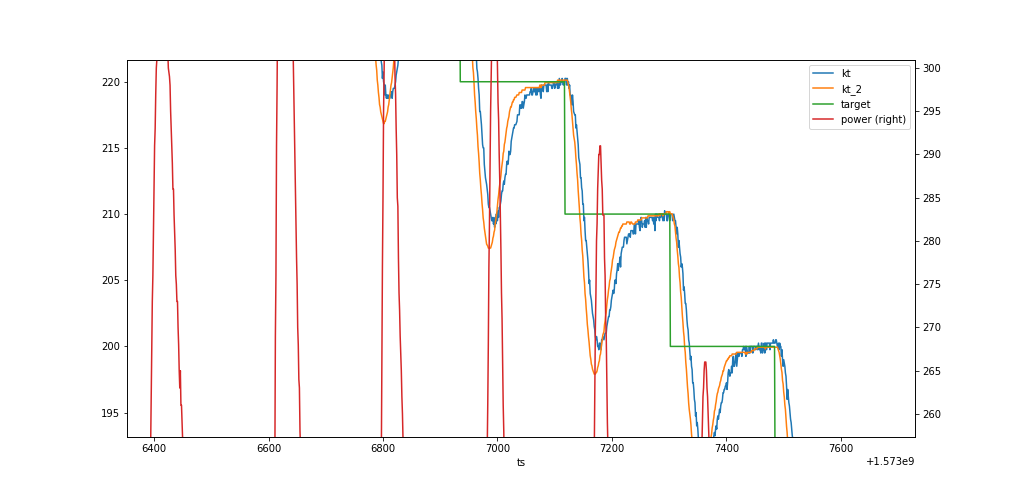

In [379]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = [[int(a) for a in s.split()] for s in open('../valurap/tc.txt').readlines() if len(s.split()) == 5]
data = np.array(data[5000:])
#data

df = pd.DataFrame({"ts": data[:,0], "kt_raw": data[:,1], "adc": data[:,2], "target": data[:,3], "power": data[:,4]})
df["kt"] = df["kt_raw"]/32.0
df["kt_2"] = (10598 + 4 * df["adc"] - 295 * np.sqrt(df["adc"]) - df["adc"] * df["adc"]/2190)/32

if 0:
    df.plot(x="kt", y="kt_2")
else:
    ax = df.plot(x="ts", y=["kt", "kt_2", "target"])
    df.plot(x="ts", y=["power"], secondary_y=True, ax=ax)